In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

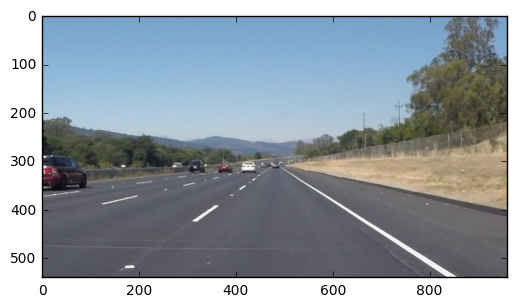

In [8]:
image = mpimg.imread('test_images/solidWhiteRight.jpg')
plt.imshow(image)

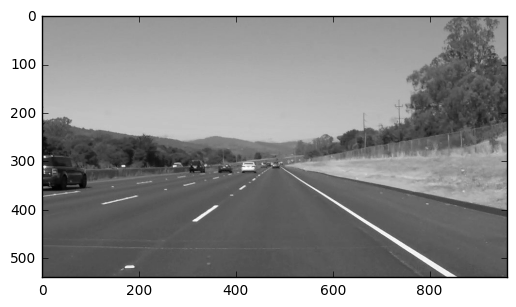

In [15]:
import math

def grayscale(img):
    return cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

image = mpimg.imread('test_images/solidWhiteRight.jpg')
plt.imshow(grayscale(image),cmap='gray')

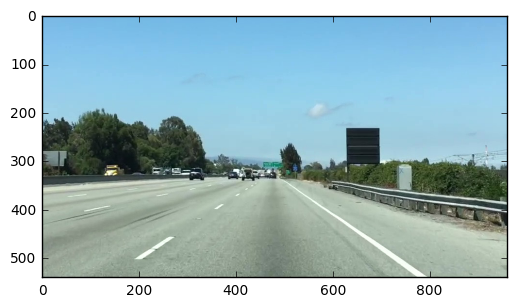

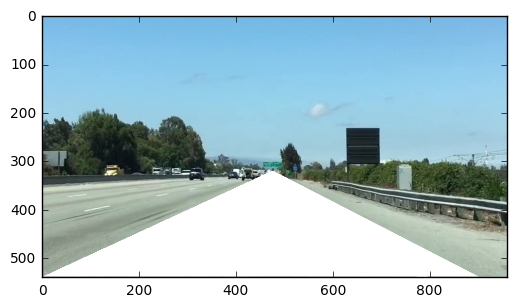

In [38]:
ysize,xsize = image.shape[0],image.shape[1]
region_select = np.copy(image)
plt.imshow(region_select)
left_bottom = [0,539]
right_bottom = [900,539]
apex = [475,320]

fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

# Color pixels red which are inside the region of interest
region_select[region_thresholds] = [255, 255, 255]

# Display the image
plt.figure()
plt.imshow(region_select)
plt.figure()
#plt.imshow(image)
#final_img = np.concatenate((region_select,image),axis=1)
#plt.imshow(final_img)

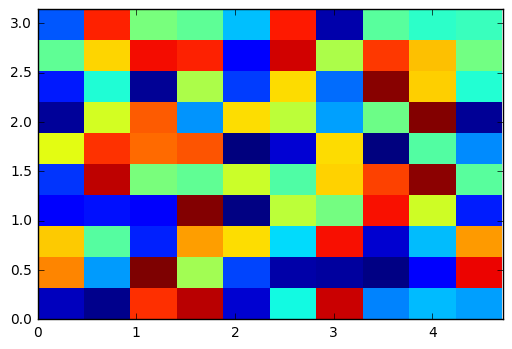

In [25]:
import mpldatacursor

data = np.random.random((10,10))

fig, ax = plt.subplots()
ax.imshow(data, interpolation='none', extent=[0, 1.5*np.pi, 0, np.pi])

mpldatacursor.datacursor(hover=True, bbox=dict(alpha=1, fc='w'),
                         formatter='i, j = {i}, {j}\nz = {z:.02g}'.format)
plt.show()


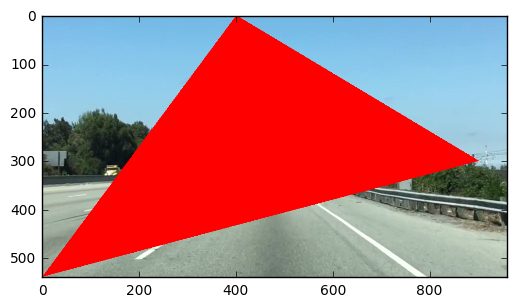

In [28]:
image = mpimg.imread('/home/jatin/Area_51/Self_Driving_Car/Module_1/test.jpg')

# Grab the x and y sizes and make two copies of the image
# With one copy we'll extract only the pixels that meet our selection,
# then we'll paint those pixels red in the original image to see our selection 
# overlaid on the original.
ysize = image.shape[0]
xsize = image.shape[1]
color_select= np.copy(image)
line_image = np.copy(image)

# Define our color criteria
red_threshold = 0
green_threshold = 0
blue_threshold = 0
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Define a triangle region of interest (Note: if you run this code, 
# Keep in mind the origin (x=0, y=0) is in the upper left in image processing
# you'll find these are not sensible values!!
# But you'll get a chance to play with them soon in a quiz ;)
left_bottom = [0, 539]
right_bottom = [900, 300]
apex = [400, 0]

fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Mask pixels below the threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                    (image[:,:,1] < rgb_threshold[1]) | \
                    (image[:,:,2] < rgb_threshold[2])

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))
# Mask color selection
color_select[color_thresholds] = [0,0,0]
# Find where image is both colored right and in the region
line_image[~color_thresholds & region_thresholds] = [255,0,0]

# Display our two output images
plt.imshow(color_select)
plt.imshow(line_image)

## Canny Edge Detection and stuff

In this part we are learning about Canny edge detection to detect edges

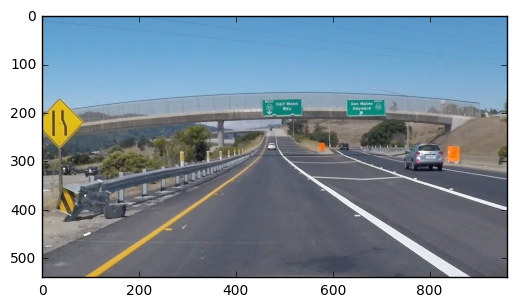

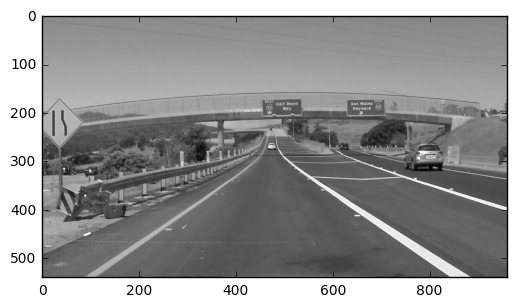

In [6]:
## Test

exit_ramp = mpimg.imread('/home/jatin/Area_51/Self_Driving_Car/Module_1/exit-ramp.jpg')
plt.imshow(exit_ramp)

gray = cv2.cvtColor(exit_ramp,cv2.COLOR_RGB2GRAY)
plt.figure()
plt.imshow(gray,cmap='gray')


Now we apply Canny edge detection but before that we apply Gaussian Blur with a kernel size of 3

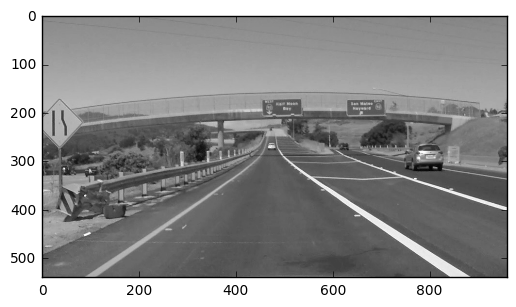

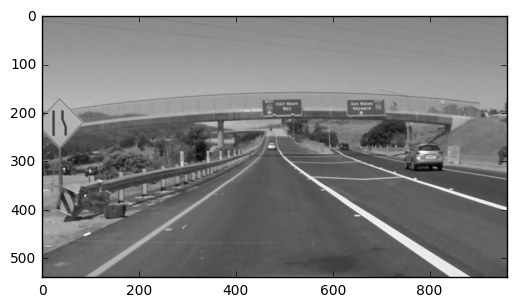

In [52]:
kernel_size = 3
blurred_image = cv2.GaussianBlur(gray,(kernel_size,kernel_size),0)
plt.imshow(gray,cmap='gray')
plt.figure()
plt.imshow(blurred_image,cmap='gray')

# Finally, CannyEdgeDetection

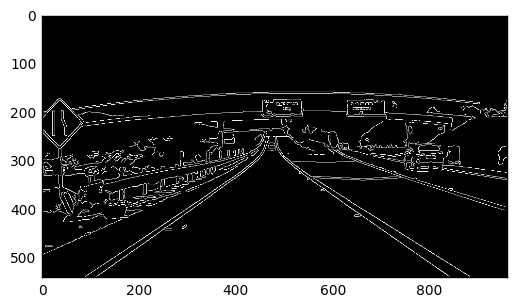

In [11]:
image = exit_ramp
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

plt.imshow(edges,cmap='Greys_r')

This approach works great but there is one issue we need to maunally define the parameters for both high and low threshold. <i> Can't we automate this </i>. Enter [*Otsu's Method*](https://en.wikipedia.org/wiki/Otsu%27s_method). 
Also check [this StackOverflow answer](http://stackoverflow.com/a/21326830/3455743)

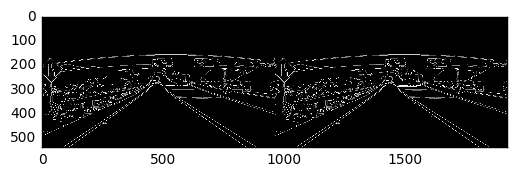

In [16]:
high_thresh, thresh_im = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
lowThresh = 0.5*high_thresh
auto_edges = cv2.Canny(blur_gray,lowThresh,high_thresh)
plt.imshow(auto_edges,cmap='Greys_r')
comparsion = np.concatenate((edges,auto_edges),axis=1)
plt.imshow(comparsion,cmap='Greys_r')

# No difference between two Left one is done manually and right one is automated

## Hough Space for Line Detection
Here we use employ properties of Hough space to detect preferrable lines.

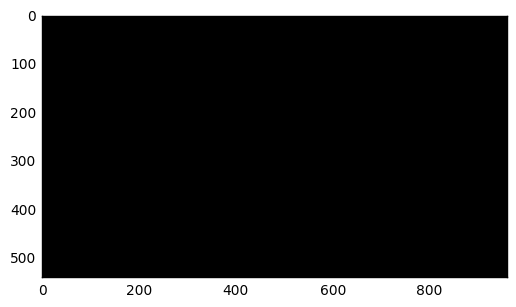

In [19]:
rho = 1
theta = np.pi/180
threshold = 1
min_line_length = 10
max_line_gap = 1
line_image = np.copy(image)*0 #creating a blank to draw lines on

# We are using a blank image, by copying the image and zeroing it
plt.imshow(line_image)



Now we use HoughLines to detect the lines

In [20]:
# Run Hough on edge detected image
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)
print(lines)
# Here lines is array containing x,y coordinates of lines


[[[595 303 605 303]]

 [[877 216 892 213]]

 [[770 222 780 222]]

 [[512 306 530 322]]

 [[ 47 473  67 464]]

 [[687 338 729 336]]

 [[161 491 361 356]]

 [[238 449 350 370]]

 [[  6 321  22 320]]

 [[773 322 788 322]]

 [[535 302 549 302]]

 [[326 350 364 332]]

 [[389 300 426 288]]

 [[210 386 220 381]]

 [[704 445 728 462]]

 [[ 68 311  78 311]]

 [[846 319 857 320]]

 [[ 35 375  36 365]]

 [[862 527 881 538]]

 [[616 338 628 338]]

 [[176 493 224 460]]

 [[224 459 237 451]]

 [[151 183 204 178]]

 [[564 303 582 303]]

 [[722 438 806 492]]

 [[474 233 490 233]]

 [[704 427 733 446]]

 [[156 219 170 218]]

 [[803 268 813 268]]

 [[588 336 601 337]]

 [[656 340 666 340]]

 [[925 334 959 339]]

 [[865 368 890 375]]

 [[218 322 239 318]]

 [[190 209 201 209]]

 [[711 297 739 303]]

 [[579 356 595 369]]

 [[ 38 379  41 364]]

 [[132 347 145 345]]

 [[252 338 264 334]]

 [[357 202 369 202]]

 [[457 210 471 210]]

 [[181 335 218 328]]

 [[467 158 484 158]]

 [[825 310 838 310]]

 [[790 504

Here we iterate over an array of lines and for each line we use cv2.line to draw a line over blank line image of 
<span style="color:red"> Red </span> color (255,0,0) with a thickness of 10 (pixels ? )

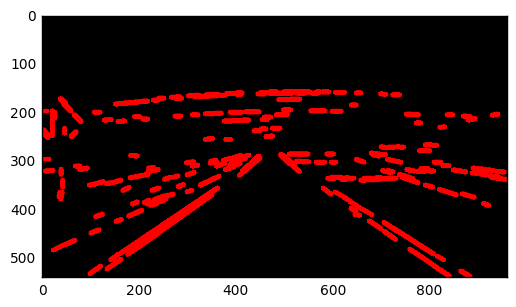

In [21]:
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

plt.imshow(line_image)

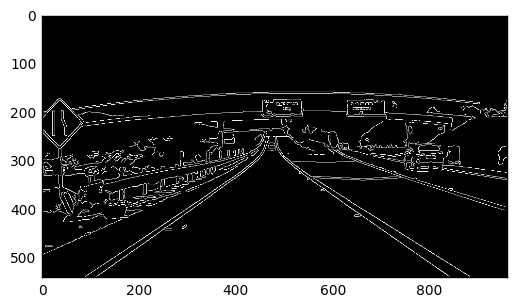

In [23]:
# Create a "color" binary image to combine with line image
# Np.dstack may be used to copy, but documetation says to create stack but still final image is same :|
color_edges = np.dstack((edges, edges, edges)) 
plt.imshow(color_edges)

## addWeighted 
It is used to overlay two separate images togethere with some level of transparency. This blog would help understand the concept. [Blog Link](http://www.pyimagesearch.com/2016/03/07/transparent-overlays-with-opencv/)

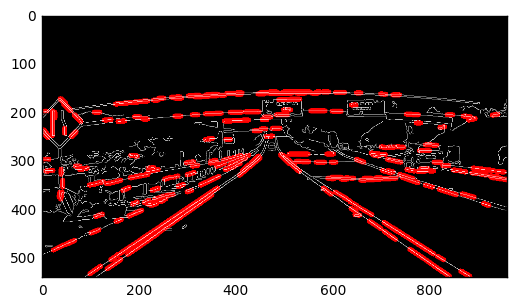

In [29]:
# Draw the lines on the edge image
combo = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(combo)

Before we dive into the project let's learn about Masking and stuff

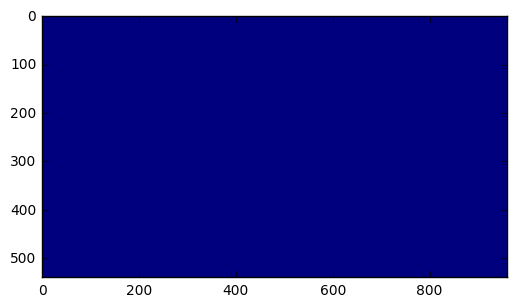

In [30]:
mask = np.zeros_like(edges)
ignore_mask_color = 255
plt.imshow(mask)

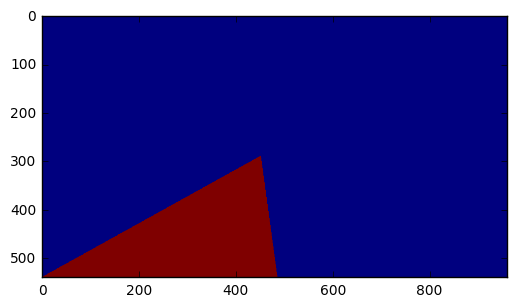

In [33]:
imshape = image.shape
ignore_mask_color = 255
vertices = np.array([[(0,imshape[0]),(450,290),(450,290),(imshape[0],imshape[1])]],dtype=np.int32)
cv2.fillPoly(mask,vertices,ignore_mask_color)

plt.imshow(mask)

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


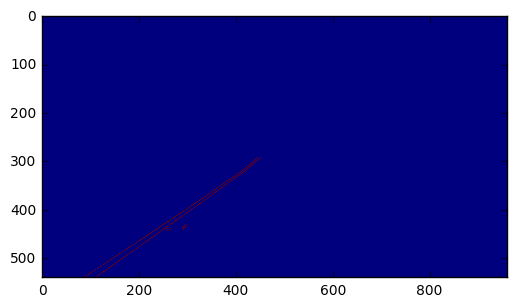

In [36]:
masked_edges = cv2.bitwise_and(edges,mask)
print(masked_edges)
plt.imshow(masked_edges)